## Mining Polish Bankruptcy Data
<table><tr><td><img src='resources/img_0.jpg'></td><td><img src='resources/img_1.jpg'></td><td><img src='resources/img_2.jpg'></td></tr></table>

### A. Import libraries and data

#### (i) libraries

In [1]:
# general utilities
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# for hyperparameters tuning and cross validation
from sklearn.model_selection import GridSearchCV

# for displaying / plotting
from IPython.display import display
import matplotlib.pyplot as plt

#### (ii) data
- loading data from arff file<br>
Reference: https://discuss.analyticsvidhya.com/t/loading-arff-type-files-in-python/27419

In [2]:
# import data
years = [1,2,3,4,5]
raw_data = {} # dictionary of dataframe

for year in years:
    arr = arff.loadarff(f"data/year{year}.arff")
    raw_data[f"year{str(year)}"] = pd.DataFrame(arr[0])

In [3]:
# check that the data is correctly load
raw_data["year1"]

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,b'1'
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,b'1'
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,b'1'
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,b'1'


#### (iii) renaming the target column
- Since the word "class" is a reserved keyword in python, better replace it by another word for easier manipulation later

In [4]:
for year in years:
    raw_data[f"year{year}"].rename(columns = {"class": "bankrupted"}, inplace = True)

### B. Data preparation and exploration

#### (i) Define attributes and target varialbles

In [5]:
features = []
for i in range(1,65):
    features.append(f"Attr{i}")

target = ["bankrupted"]

X = {}
Y = {}

for year in years:
    X[f"year{year}"] = raw_data[f"year{year}"][features]
    Y[f"year{year}"] = raw_data[f"year{year}"][target]

#### (ii) Train test split

In [6]:
X_train = {}
X_test = {}
Y_train = {}
Y_test = {}

for year in years:
    X_train[f"year{year}"], X_test[f"year{year}"], Y_train[f"year{year}"], Y_test[f"year{year}"] = train_test_split(X[f"year{year}"], Y[f"year{year}"], test_size=0.2, random_state=1)

In [7]:
# reset the indices for all dataframe
for year in years:
    X_train[f"year{year}"].reset_index(drop=True, inplace=True)
    X_test[f"year{year}"].reset_index(drop=True, inplace=True)
    Y_train[f"year{year}"].reset_index(drop=True, inplace=True)
    Y_test[f"year{year}"].reset_index(drop=True, inplace=True)

#### (iii) inspect missing values and data type of data
Using year 1 train data as an example: <br>
- we can observe that the problem of missing values is quite serious, e.g., for Attr37, there are only 3435 Non-Null values out of 5621 entries
- all attributes are in floating point data type, which is desirable
- however, the datatype of our target (class) is byte string, we need to convert it into binary number (int) - 0 or 1

In [8]:
X_train["year1"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5621 entries, 0 to 5620
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   5619 non-null   float64
 1   Attr2   5619 non-null   float64
 2   Attr3   5619 non-null   float64
 3   Attr4   5595 non-null   float64
 4   Attr5   5613 non-null   float64
 5   Attr6   5619 non-null   float64
 6   Attr7   5619 non-null   float64
 7   Attr8   5600 non-null   float64
 8   Attr9   5621 non-null   float64
 9   Attr10  5619 non-null   float64
 10  Attr11  5594 non-null   float64
 11  Attr12  5595 non-null   float64
 12  Attr13  5621 non-null   float64
 13  Attr14  5619 non-null   float64
 14  Attr15  5619 non-null   float64
 15  Attr16  5600 non-null   float64
 16  Attr17  5600 non-null   float64
 17  Attr18  5619 non-null   float64
 18  Attr19  5621 non-null   float64
 19  Attr20  5621 non-null   float64
 20  Attr21  4327 non-null   float64
 21  Attr22  5619 non-null   float64
 22  

In [9]:
# fill the NaN values with corresponding column mean of the TRAIN SET for both train and test set

for year in years:
    mean_values = X_train[f"year{year}"].mean()
    X_train[f"year{year}"] = X_train[f"year{year}"].fillna(value=mean_values)
    X_test[f"year{year}"] = X_test[f"year{year}"].fillna(value=mean_values)

In [10]:
# double check all dataframes have zero missing values
for year in years:
    if (X_train[f"year{year}"].isna().sum().sum() == 0):
        print(f"year{year} train set contains mo missing values")
    if (X_test[f"year{year}"].isna().sum().sum() == 0):
        print(f"year{year} test set contains mo missing values")

year1 train set contains mo missing values
year1 test set contains mo missing values
year2 train set contains mo missing values
year2 test set contains mo missing values
year3 train set contains mo missing values
year3 test set contains mo missing values
year4 train set contains mo missing values
year4 test set contains mo missing values
year5 train set contains mo missing values
year5 test set contains mo missing values


For the target variable "class", we need to convert byte into binary variable (0 and 1)

In [11]:
type(Y_train["year1"].iloc[0][0])

bytes

In [12]:
int.from_bytes(Y_train["year1"].iloc[0][0], "big")

48

The view and copy properties of pandas is quite complicated. References for the following code to prevent SettingWithCopywarning:
- https://www.youtube.com/watch?v=4R4WsDJ-KVc
- https://towardsdatascience.com/3-solutions-for-the-setting-with-copy-warning-of-python-pandas-dfe15d62de08

In [13]:
# ASCII code for b'0' is 48
# ASCII code for b'1' is 49

# apply change of datatype on the "class" variable

for year in years:
    train_copy = Y_train[f"year{year}"].copy()
    test_copy = Y_test[f"year{year}"].copy()
    train_copy["bankrupted"] = Y_train[f"year{year}"].bankrupted.apply(lambda x: 0 if (int.from_bytes(x, "big") == 48)  else 1)
    test_copy["bankrupted"] = Y_test[f"year{year}"].bankrupted.apply(lambda x: 0 if (int.from_bytes(x, "big") == 48)  else 1)
    Y_train[f"year{year}"] = train_copy.copy()
    Y_test[f"year{year}"] = test_copy.copy()

#### (iv) inspect the distribution of the target variable
Reference: https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged

- from the graph plotting below, we can observe a seriosu class imbalance in our target variable, while our variable of interest (bankruptcy) is the minority group
- for such imbalanced dataset, evaluation metrics such as precision and recall should be emphasized over accuracy

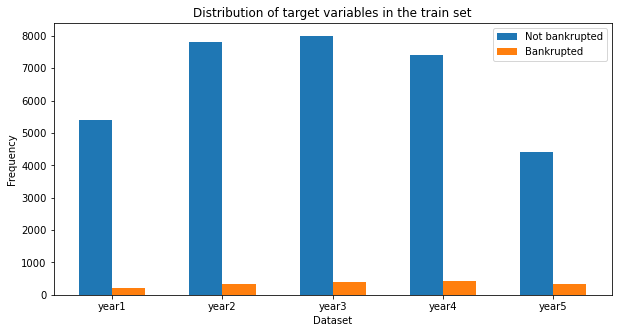

In [14]:
class_0 = []
class_1 = []
x_axis_label = []

for year in years:
    class_0.append(Y_train[f"year{year}"]["bankrupted"].value_counts()[0])
    class_1.append(Y_train[f"year{year}"]["bankrupted"].value_counts()[1])
    x_axis_label.append(f"year{year}")
    
# position of bars on x-axis
ind = np.arange(5)

# figure size
plt.figure(figsize=(10,5))

# width of bar
width = 0.3

# Plotting
plt.bar(ind, class_0 , width, label="Not bankrupted")
plt.bar(ind + width, class_1, width, label="Bankrupted")
        
plt.xlabel("Dataset")
plt.ylabel("Frequency")
plt.title("Distribution of target variables in the train set")

plt.xticks(ind + width / 2, x_axis_label)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

#### (v) perform normalization
- standardization may help the convergence of logistic regression if we perform regularization
- however, normalization generally has little effect on Decision Tree Model and Naive Bayes Model
- here we use the train set to create the scaler for both train set and test set, since we assume the train set is representable enough

In [15]:
# create scalers for each year's dataset

# a dictionary of scalers
z_score_scaler = {}

for year in years:
    z_score_scaler[f"year{year}"] = preprocessing.StandardScaler().fit(X_train[f"year{year}"])

In [16]:
# apply the scalers to each dataset

for year in years:
    X_train[f"year{year}"] = z_score_scaler[f"year{year}"].transform(X_train[f"year{year}"])
    X_test[f"year{year}"] = z_score_scaler[f"year{year}"].transform(X_test[f"year{year}"])

### C. Data modeling

We are performing a classification task, and our team will try out the following models:
- Decision Tree Model
- Random Forest Model
- Gaussian Naive Bayes Model
- Logistic Regression Model

#### (i) Decision Tree Model

The following hyper-paramteres will be used in the decision tree model:
- max_depth
- max_leaf_nodes

In [17]:
depths = np.arange(1, 21)
max_leafs = np.arange(5,51,5)

In [18]:
# define a grid of decision tree hyperparameters
decsion_tree_try_grid = [{"max_depth":depths,
                          "max_leaf_nodes":max_leafs}]

In [19]:
# dictionary of models for grid search CV
DTM = {}

for year in years:
    DTM[f"year{year}"] = GridSearchCV(DecisionTreeClassifier(), param_grid=decsion_tree_try_grid, cv=10)

In [20]:
# fit the training set
for year in years:
    DTM[f"year{year}"].fit(X_train[f"year{year}"], Y_train[f"year{year}"])

The following table summaries the "best" hyper-parameters and accruacy score for each year

In [31]:
max_depth = []
max_leaf_nodes = []
best_score = []

for year in years:
    max_depth.append(DTM[f"year{year}"].best_params_["max_depth"])
    max_leaf_nodes.append(DTM[f"year{year}"].best_params_["max_leaf_nodes"])
    best_score.append(DTM[f"year{year}"].best_score_)

In [32]:
d = {"year":years, "max_depth":max_depth, "max_leaf_nodes":max_leaf_nodes, "best_score":best_score}
pd.DataFrame(data=d, index=None)

,year,max_depth,max_leaf_nodes,best_score
0,1,13,15,0.976517
1,2,6,10,0.974809
2,3,10,5,0.963819
3,4,11,15,0.958892
4,5,7,20,0.948390


In [34]:
# train the final decision tree models according to the best parameters
DTM_final = {}

for year in years:
    DTM_final[f"year{year}"] = DecisionTreeClassifier(max_depth = DTM[f"year{year}"].best_params_["max_depth"],
                                                      max_leaf_nodes = DTM[f"year{year}"].best_params_["max_leaf_nodes"])
    
    DTM_final[f"year{year}"].fit(X_train[f"year{year}"], Y_train[f"year{year}"])

### D. Model evaluation